In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

module_path = (Path().resolve().parent/ "Modules")
sys.path.append(str(module_path))

import my_modules, model_tuner, model_tuner_multi, features, skill_calculators, feature_selector
pd.set_option("display.max_columns", None)
pd.option_context(
        'display.max_info_rows', None,     # 行しきい値を無制限
        'display.max_info_columns', None
        )

plt.rcParams['font.family'] = 'Yu Gothic'

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
df = pd.read_csv("../Data/train_data_JV_2008.csv", encoding="cp932")
# odds_df = pd.read_csv("../Data/Time_Series_Odds_win_odds.csv", encoding="shift-jis")

In [3]:
df2 = my_modules.preprocessing(df)

In [4]:
df3 = my_modules.common_process(df2)

C:\Users\ken05\Documents\others\HORSE_RACING\Modules\my_modules.py:77: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["place_num"] = df["place"].replace(place_dict).astype(int)


In [5]:
# 計算に時間がかかりすぎるので、とりあえず2020年からのデータをつかって実験
df3 = df3[df3.year >= 2018]

In [6]:
feature_col = []
ranking_col = []
df4, feature_col2, ranking_col2 = skill_calculators.all_rating_calculator(df3, feature_col, ranking_col)

calculating horse trueskill is in progress
calculating jockey trueskill is in progress
calculating horse EloRating is in progress
calculating jockey EloRating is in progress
calculating Glicko2 is in progress
poly calculated


In [7]:
feature_col2.extend(["waku_num", "horse_num", "sex", "age", "basis_weight", "weight", "inc_dec", "age_type"])
df5, feature_col3 = features.sub_feature_engineering(df4, feature_col2, ranking_col2)

calc grouped rating caluculated
group_winning_rate_calculated
added last odds
num_col are standardize
calculated rankings
['horse_TrueSkill', 'horse_TrueSkill_sigma', 'horse_TrueSkill_min', 'horse_TrueSkill_max', 'jockey_TrueSkill', 'jockey_TrueSkill_sigma', 'jockey_TrueSkill_min', 'jockey_TrueSkill_max', 'horse_EloRating', 'jockey_EloRating', 'horse_Glicko2', 'horse_Glicko2_RD', 'horse_Glicko2_min', 'horse_Glicko2_max', 'horse_TrueSkill_diff_from_last1_racing', 'horse_TrueSkill_diff_from_last3_racing', 'jockey_TrueSkill_diff_from_last1_racing', 'jockey_TrueSkill_diff_from_last3_racing', 'horse_EloRating_diff_from_last1_racing', 'horse_EloRating_diff_from_last3_racing', 'jockey_EloRating_diff_from_last1_racing', 'jockey_EloRating_diff_from_last3_racing', 'horse_Glicko2_diff_from_last1_racing', 'horse_Glicko2_diff_from_last3_racing', 'horse_TrueSkill horse_TrueSkill_min', 'horse_TrueSkill horse_TrueSkill_max', 'horse_TrueSkill jockey_TrueSkill', 'horse_TrueSkill jockey_TrueSkill_min', '

,race_id,year,month,day,times,place,daily,race_num,horse,jockey_id,trainer_id,owner,breeding_farm,breeding_place,horse_N,waku_num,horse_num,class_code,track_code,corner_num,dist,state,weather,age_code,sex,age,basis_weight,blinker,weight,inc_dec,weight_code,win_odds,win_mul_odds_Hi,win_mul_odds_Lo,rank,time_diff,time,corner1_rank,corner2_rank,corner3_rank,corner4_rank,last_3F_time,last_3F_rank,Ave_3F,PCI,PCI3,RPCI,last_3F_time_diff,leg,pop,prize,error_code,father,mother,broodmare_sire,broodmare_sire_type,horse_color,id,id_for_fold,field_type,flat_or_jump,turn_type,race_type,waku,datetime,age_type,dist_type,is_1st_rank,is_in_3rd_rank,target,horse_TrueSkill,horse_TrueSkill_sigma,horse_TrueSkill_min,horse_TrueSkill_max,horse_TrueSkill_after_racing,jockey_TrueSkill,jockey_TrueSkill_sigma,jockey_TrueSkill_min,jockey_TrueSkill_max,jockey_TrueSkill_after_racing,horse_EloRating,horse_EloRating_after_racing,jockey_EloRating,jockey_EloRating_after_racing,horse_Glicko2,horse_Glicko2_RD,horse_Glicko2_min,horse_Glicko2_max,horse_Glicko2_after_racing,horse_TrueSkill_diff_from_last1_racing,horse_TrueSkill_diff_from_last3_racing,jockey_TrueSkill_diff_from_last1_racing,jockey_TrueSkill_diff_from_last3_racing,horse_EloRating_diff_from_last1_racing,horse_EloRating_diff_from_last3_racing,jockey_EloRating_diff_from_last1_racing,jockey_EloRating_diff_from_last3_racing,horse_Glicko2_diff_from_last1_racing,horse_Glicko2_diff_from_last3_racing,horse_TrueSkill horse_TrueSkill_min,horse_TrueSkill horse_TrueSkill_max,horse_TrueSkill jockey_TrueSkill,horse_TrueSkill jockey_TrueSkill_min,horse_TrueSkill jockey_TrueSkill_max,horse_TrueSkill horse_EloRating,horse_TrueSkill jockey_EloRating,horse_TrueSkill horse_Glicko2,horse_TrueSkill horse_Glicko2_min,horse_TrueSkill horse_Glicko2_max,horse_TrueSkill_min horse_TrueSkill_max,horse_TrueSkill_min jockey_TrueSkill,horse_TrueSkill_min jockey_TrueSkill_min,horse_TrueSkill_min jockey_TrueSkill_max,horse_TrueSkill_min horse_EloRating,horse_TrueSkill_min jockey_EloRating,horse_TrueSkill_min horse_Glicko2,horse_TrueSkill_min horse_Glicko2_min,horse_TrueSkill_min horse_Glicko2_max,horse_TrueSkill_max jockey_TrueSkill,horse_TrueSkill_max jockey_TrueSkill_min,horse_TrueSkill_max jockey_TrueSkill_max,horse_TrueSkill_max horse_EloRating,horse_TrueSkill_max jockey_EloRating,horse_TrueSkill_max horse_Glicko2,horse_TrueSkill_max horse_Glicko2_min,horse_TrueSkill_max horse_Glicko2_max,jockey_TrueSkill jockey_TrueSkill_min,jockey_TrueSkill jockey_TrueSkill_max,jockey_TrueSkill horse_EloRating,jockey_TrueSkill jockey_EloRating,jockey_TrueSkill horse_Glicko2,jockey_TrueSkill horse_Glicko2_min,jockey_TrueSkill horse_Glicko2_max,jockey_TrueSkill_min jockey_TrueSkill_max,jockey_TrueSkill_min horse_EloRating,jockey_TrueSkill_min jockey_EloRating,jockey_TrueSkill_min horse_Glicko2,jockey_TrueSkill_min horse_Glicko2_min,jockey_TrueSkill_min horse_Glicko2_max,jockey_TrueSkill_max horse_EloRating,jockey_TrueSkill_max jockey_EloRating,jockey_TrueSkill_max horse_Glicko2,jockey_TrueSkill_max horse_Glicko2_min,jockey_TrueSkill_max horse_Glicko2_max,horse_EloRating jockey_EloRating,horse_EloRating horse_Glicko2,horse_EloRating horse_Glicko2_min,horse_EloRating horse_Glicko2_max,jockey_EloRating horse_Glicko2,jockey_EloRating horse_Glicko2_min,jockey_EloRating horse_Glicko2_max,horse_Glicko2 horse_Glicko2_min,horse_Glicko2 horse_Glicko2_max,horse_Glicko2_min horse_Glicko2_max,weight_last_1,weight_last_2,weight_last_3,weight_mean_last_1_to_3,weight_mean_all,inc_dec_last_1,inc_dec_last_2,inc_dec_last_3,inc_dec_mean_last_1_to_3,inc_dec_mean_all,last_3F_time_last_1,last_3F_time_last_2,last_3F_time_last_3,last_3F_time_mean_last_1_to_3,last_3F_time_mean_all,Ave_3F_last_1,Ave_3F_last_2,Ave_3F_last_3,Ave_3F_mean_last_1_to_3,Ave_3F_mean_all,num_of_entries,中団,先行,後方,逃げ,ﾏｸﾘ,後方_per_entries,後方_cumcount_past_racing,中団_per_entries,中団_cumcount_past_racing,逃げ_per_entries,逃げ_cumcount_past_racing,先行_per_entries,先行_cumcount_past_racing,ﾏｸﾘ_per_entries,ﾏｸﾘ_cumcount

In [8]:
df5[feature_col3]

,horse_TrueSkill,horse_TrueSkill_sigma,horse_TrueSkill_min,horse_TrueSkill_max,jockey_TrueSkill,jockey_TrueSkill_sigma,jockey_TrueSkill_min,jockey_TrueSkill_max,horse_EloRating,jockey_EloRating,horse_Glicko2,horse_Glicko2_RD,horse_Glicko2_min,horse_Glicko2_max,horse_TrueSkill_diff_from_last1_racing,horse_TrueSkill_diff_from_last3_racing,jockey_TrueSkill_diff_from_last1_racing,jockey_TrueSkill_diff_from_last3_racing,horse_EloRating_diff_from_last1_racing,horse_EloRating_diff_from_last3_racing,jockey_EloRating_diff_from_last1_racing,jockey_EloRating_diff_from_last3_racing,horse_Glicko2_diff_from_last1_racing,horse_Glicko2_diff_from_last3_racing,horse_TrueSkill horse_TrueSkill_min,horse_TrueSkill horse_TrueSkill_max,horse_TrueSkill jockey_TrueSkill,horse_TrueSkill jockey_TrueSkill_min,horse_TrueSkill jockey_TrueSkill_max,horse_TrueSkill horse_EloRating,horse_TrueSkill jockey_EloRating,horse_TrueSkill horse_Glicko2,horse_TrueSkill horse_Glicko2_min,horse_TrueSkill horse_Glicko2_max,horse_TrueSkill_min horse_TrueSkill_max,horse_TrueSkill_min jockey_TrueSkill,horse_TrueSkill_min jockey_TrueSkill_min,horse_TrueSkill_min jockey_TrueSkill_max,horse_TrueSkill_min horse_EloRating,horse_TrueSkill_min jockey_EloRating,horse_TrueSkill_min horse_Glicko2,horse_TrueSkill_min horse_Glicko2_min,horse_TrueSkill_min horse_Glicko2_max,horse_TrueSkill_max jockey_TrueSkill,horse_TrueSkill_max jockey_TrueSkill_min,horse_TrueSkill_max jockey_TrueSkill_max,horse_TrueSkill_max horse_EloRating,horse_TrueSkill_max jockey_EloRating,horse_TrueSkill_max horse_Glicko2,horse_TrueSkill_max horse_Glicko2_min,horse_TrueSkill_max horse_Glicko2_max,jockey_TrueSkill jockey_TrueSkill_min,jockey_TrueSkill jockey_TrueSkill_max,jockey_TrueSkill horse_EloRating,jockey_TrueSkill jockey_EloRating,jockey_TrueSkill horse_Glicko2,jockey_TrueSkill horse_Glicko2_min,jockey_TrueSkill horse_Glicko2_max,jockey_TrueSkill_min jockey_TrueSkill_max,jockey_TrueSkill_min horse_EloRating,jockey_TrueSkill_min jockey_EloRating,jockey_TrueSkill_min horse_Glicko2,jockey_TrueSkill_min horse_Glicko2_min,jockey_TrueSkill_min horse_Glicko2_max,jockey_TrueSkill_max horse_EloRating,jockey_TrueSkill_max jockey_EloRating,jockey_TrueSkill_max horse_Glicko2,jockey_TrueSkill_max horse_Glicko2_min,jockey_TrueSkill_max horse_Glicko2_max,horse_EloRating jockey_EloRating,horse_EloRating horse_Glicko2,horse_EloRating horse_Glicko2_min,horse_EloRating horse_Glicko2_max,jockey_EloRating horse_Glicko2,jockey_EloRating horse_Glicko2_min,jockey_EloRating horse_Glicko2_max,horse_Glicko2 horse_Glicko2_min,horse_Glicko2 horse_Glicko2_max,horse_Glicko2_min horse_Glicko2_max,waku_num,horse_num,sex,age,basis_weight,weight,inc_dec,age_type,weight_last_1,weight_last_2,weight_last_3,weight_mean_last_1_to_3,weight_mean_all,inc_dec_last_1,inc_dec_last_2,inc_dec_last_3,inc_dec_mean_last_1_to_3,inc_dec_mean_all,last_3F_time_last_1,last_3F_time_last_2,last_3F_time_last_3,last_3F_time_mean_last_1_to_3,last_3F_time_mean_all,Ave_3F_last_1,Ave_3F_last_2,Ave_3F_last_3,Ave_3F_mean_last_1_to_3,Ave_3F_mean_all,num_of_entries,後方_per_entries,後方_cumcount_past_racing,中団_per_entries,中団_cumcount_past_racing,逃げ_per_entries,逃げ_cumcount_past_racing,先行_per_entries,先行_cumcount_past_racing,ﾏｸﾘ_per_entries,ﾏｸﾘ_cumcount_past_racing,past_rank_mean,past_rank_mean_grouped_waku,past_rank_mean_grouped_dist_type,past_rank_mean_grouped_dist,past_rank_mean_grouped_class_code,past_rank_mean_grouped_place,past_rank_mean_grouped_dist_type_waku,past_corner1_rank_mean,past_corner1_rank_mean_grouped_dist_type,past_corner1_rank_mean_grouped_dist,past_corner2_rank_mean,past_corner2_rank_mean_grouped_dist_type,past_corner2_rank_mean_grouped_dist,past_corner3_rank_mean,past_corner3_rank_mean_grouped_dist_type,past_corner3_rank_mean_grouped_dist,past_corner4_rank_mean,past_corner4_rank_mean_grouped_dist_type,past_corner4_rank_mean_grouped_dist,past_pop_mean,past_pop_mean_grouped_dist,past_pop_mean_grouped_dist_type,past_pop_mean_grouped_place,past_pop_mean_grouped_cl

In [9]:
df6, feature_col4 = feature_selector.select_from_model(df5, feature_col3)
df6[feature_col4].head()

C:\Users\ken05\Documents\others\HORSE_RACING\Modules\feature_selector.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df[col] = select_df[col].astype("category")
C:\Users\ken05\Documents\others\HORSE_RACING\Modules\feature_selector.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df[col] = select_df[col].astype("category")


,horse_EloRating,horse_Glicko2_RD,horse_Glicko2_min,horse_TrueSkill_diff_from_last1_racing,horse_TrueSkill_diff_from_last3_racing,horse_EloRating_diff_from_last1_racing,horse_EloRating_diff_from_last3_racing,horse_Glicko2_diff_from_last1_racing,horse_Glicko2_diff_from_last3_racing,horse_TrueSkill_min horse_Glicko2_min,jockey_TrueSkill horse_Glicko2_max,jockey_TrueSkill_min horse_Glicko2_max,jockey_TrueSkill_max horse_Glicko2_max,horse_EloRating jockey_EloRating,jockey_EloRating horse_Glicko2_max,horse_Glicko2 horse_Glicko2_min,horse_Glicko2_min horse_Glicko2_max,sex,age,weight,age_type,weight_last_1,weight_last_2,weight_last_3,weight_mean_last_1_to_3,weight_mean_all,inc_dec_mean_all,last_3F_time_last_1,last_3F_time_last_2,last_3F_time_last_3,last_3F_time_mean_last_1_to_3,last_3F_time_mean_all,中団_per_entries,中団_cumcount_past_racing,逃げ_per_entries,逃げ_cumcount_past_racing,先行_per_entries,past_rank_mean,past_rank_mean_grouped_class_code,past_corner1_rank_mean,past_corner1_rank_mean_grouped_dist_type,past_corner2_rank_mean,past_corner2_rank_mean_grouped_dist_type,past_corner2_rank_mean_grouped_dist,past_corner3_rank_mean,past_corner3_rank_mean_grouped_dist_type,past_corner3_rank_mean_grouped_dist,past_pop_mean,past_pop_mean_grouped_dist_type,past_pop_mean_grouped_class_code,past_last_3F_rank_mean_grouped_dist,past_last_3F_rank_mean_grouped_dist_type,past_last_3F_rank_mean_grouped_dist_type_waku,past_last_3F_time_mean,past_last_3F_time_mean_grouped_dist,past_last_3F_time_mean_grouped_dist_type,past_last_3F_time_mean_grouped_dist_type_waku,basis_weight_per_weight,lifetime_prize_per_race,mean_horse_TrueSkill_in_group_father_state_field_type,mean_horse_TrueSkill_in_group_father_place_dist,mean_horse_TrueSkill_in_group_father_field_type,mean_horse_TrueSkill_in_group_father_trainer_id,mean_horse_TrueSkill_in_group_father_race_type,mean_horse_TrueSkill_in_group_mother_state_field_type,mean_horse_TrueSkill_in_group_mother_place_field_type,mean_horse_TrueSkill_in_group_mother_field_type,mean_horse_TrueSkill_in_group_mother_jockey_id,mean_horse_TrueSkill_in_group_broodmare_sire_place_field_type,mean_horse_TrueSkill_in_group_broodmare_sire_dist,mean_horse_TrueSkill_in_group_father_broodmare_sire,mean_horse_TrueSkill_in_group_father_broodmare_sire_field_type,mean_horse_TrueSkill_in_group_father_broodmare_sire_jockey_id,all_prize_in_group_mother,all_win_rate_horse,all_win_rate3_horse,horse_win_rate3_track_code,horse_win_rate_field_type,horse_win_rate3_field_type,horse_win_rate3_corner_num,horse_win_rate3_class_code,horse_win_rate3_age_code,horse_win_rate3_jockey_id,horse_win_rate3_jockey_id_field_type,horse_win_rate3_dist_class_code,horse_win_rate3_dist_type_class_code,horse_win_rate3_place_field_type_dist_type,all_win_rate3_field_type_dist_waku,all_win_rate3_dist_place_waku,all_win_rate_field_type_place_waku,all_win_rate3_field_type_place_waku,all_win_rate_corner_num_waku,all_win_rate3_corner_num_waku,all_win_rate_corner_num_field_type_waku,all_win_rate_jockey_id_place_dist,all_win_rate_jockey_id_class_code_field_type,all_win_rate_trainer_id,all_win_rate3_trainer_id,all_win_rate_trainer_id_race_type_waku,all_win_rate_trainer_id_class_code,all_win_rate3_trainer_id_class_code,all_win_rate_trainer_id_class_code_field_type,all_win_rate3_trainer_id_class_code_field_type,all_win_rate_trainer_id_class_code_race_type_waku,tansho_odds_20,jockey_TrueSkill horse_Glicko2_ranking,jockey_TrueSkill_min horse_Glicko2_ranking,jockey_TrueSkill_max horse_Glicko2_ranking,tansho_odds_20_ranking
185793,-0.948217,0.245346,-1.756126,-0.470874,-1.832470,-0.421361,-0.930744,-0.474421,-1.931024,-1.615236,-0.749225,-0.711132,-0.783581,0.294603,-0.868090,-1.646091,-1.602285,牝,NaN,-0.439412,3,-0.408355,-0.408355,-0.408355,-0.408355,-0.356600,-0.216282,NaN,NaN,NaN,NaN,-3.388968,-0.589910,-0.393974,-0.30804,-0.365963,0.206927,-0.202784,-0.436737,NaN,NaN,NaN,NaN,NaN,-0.942181,-1.102769,-0.637838,-0.698326,-0.535669,-1.210744,1.409629,0.446266,NaN,-3.388968,1.161250,-3.035319,N

[I 2025-07-09 23:02:30,241] A new study created in memory with name: no-name-2f35f247-b412-4e91-ad9e-d3e225703479
[I 2025-07-09 23:02:33,847] Trial 0 finished with value: 0.6646417961777933 and parameters: {'max_bin': 102, 'num_leaves': 96, 'min_data_in_leaf': 79, 'min_sum_hessian_in_leaf': 5.9865848459837805, 'bagging_fraction': 0.46240745617697465, 'bagging_freq': 16, 'feature_fraction': 0.15227525095137953, 'lambda_l1': 4.589458612326471, 'lambda_l2': 0.010260065124896791, 'min_gain_to_split': 7.080725777960454, 'max_depth': 4, 'learning_rate': 0.41472250004816347, 'path_smooth': 4.329770563201687, 'feature_fraction_bynode': 0.6424678221356552, 'extra_trees': False}. Best is trial 0 with value: 0.6646417961777933.
[I 2025-07-09 23:03:00,455] Trial 1 finished with value: 0.6593362778247788 and parameters: {'max_bin': 84, 'num_leaves': 53, 'min_data_in_leaf': 54, 'min_sum_hessian_in_leaf': 2.9122914090681276, 'bagging_fraction': 0.6447411578889518, 'bagging_freq': 14, 'feature_fractio

Best params :  {'max_bin': 144, 'num_leaves': 20, 'min_data_in_leaf': 98, 'min_sum_hessian_in_leaf': 7.751328235859817, 'bagging_fraction': 0.7757995766256757, 'bagging_freq': 90, 'feature_fraction': 0.6381099809299766, 'lambda_l1': 16.547879518482567, 'lambda_l2': 7.672290184186785e-08, 'min_gain_to_split': 1.959828624191452, 'max_depth': 6, 'learning_rate': 0.007551909976018511, 'path_smooth': 2.554709158757928, 'feature_fraction_bynode': 0.6542698063547792, 'extra_trees': True}


Before Calibrating Train Logloss: 0.6454622913770848
Before Calibrating Test  Logloss: 0.6486175373094492
Calibrated Train Logloss: 0.6485876866227736
Calibrated Test  Logloss 0.6398628426375889
↑これらは正規化する前のデータを用いていることに注意


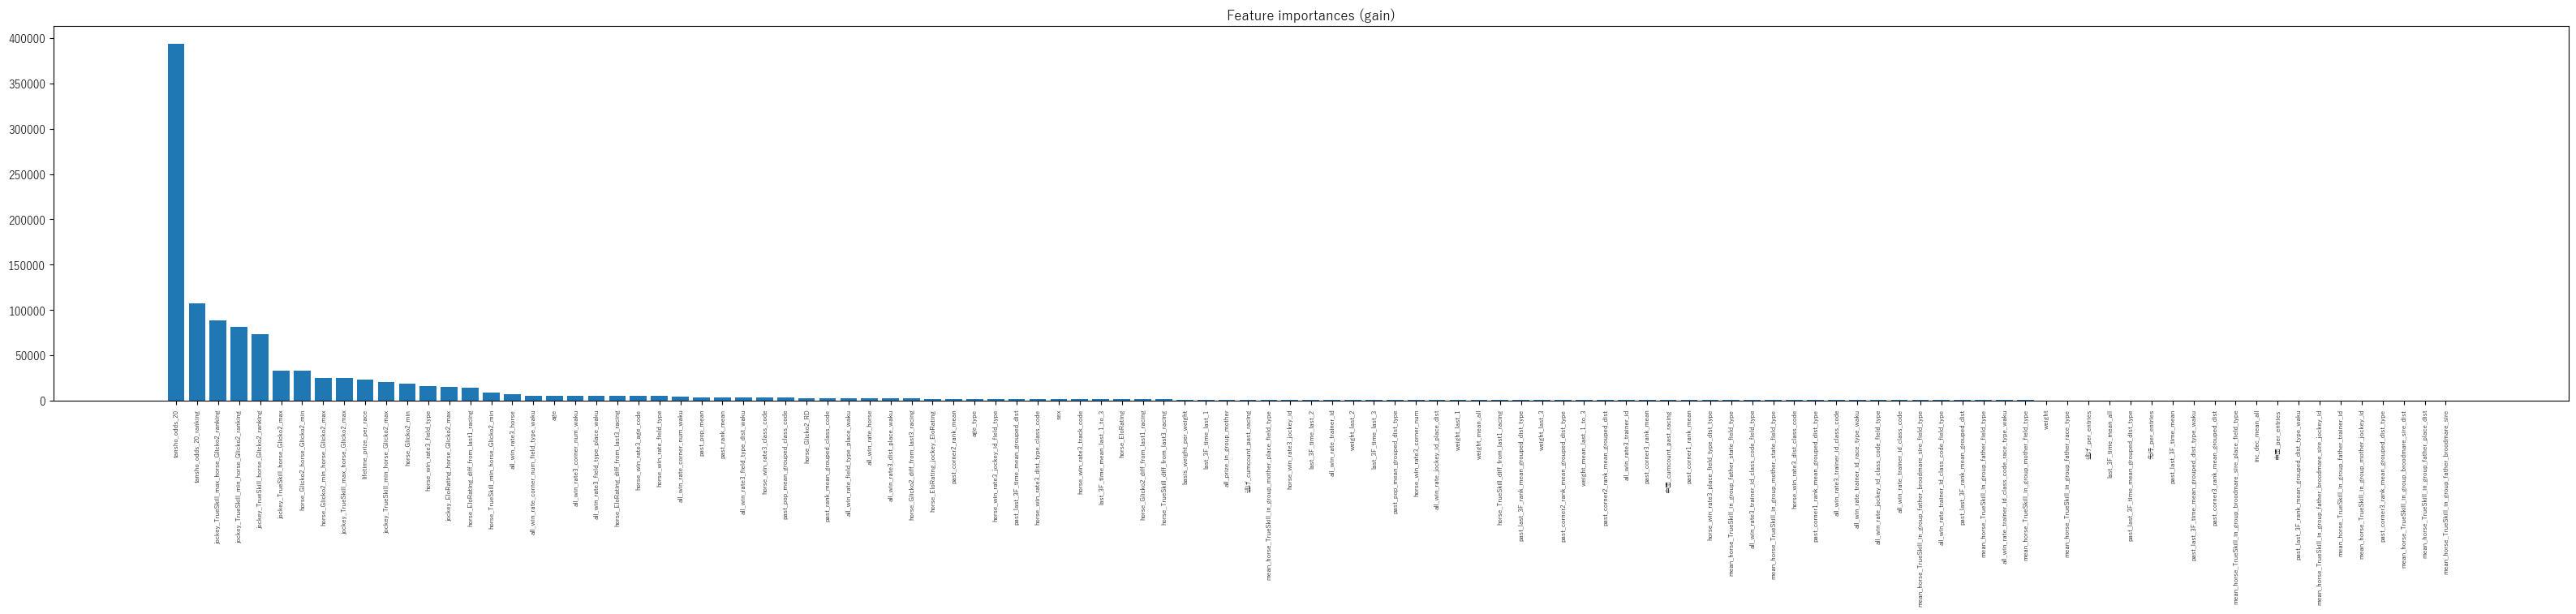

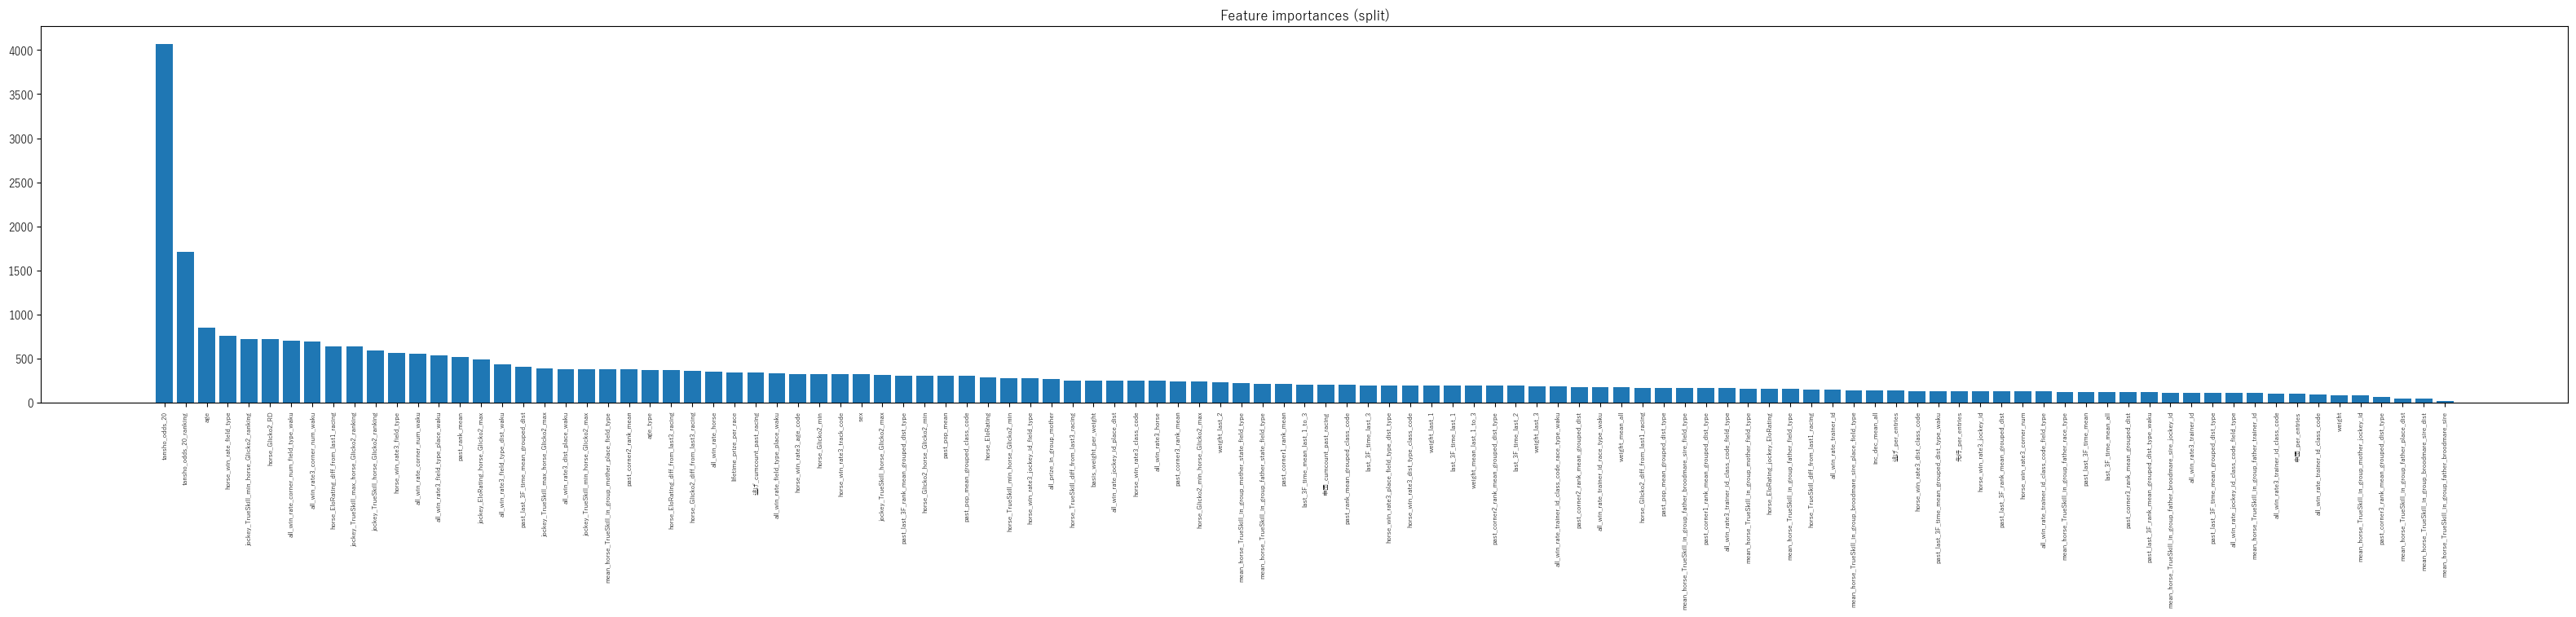

logloss is saved
auc_score is saved


,date,memo,horse_5,horse_6,horse_7,horse_8,horse_9,horse_10,horse_11,horse_12,horse_13,horse_14,horse_15,horse_16,horse_17,horse_18,all_logloss,auc(ovr)
0,2025/07/09 23:07,"base_model + feature selection with lightGBM, ...",1.397638,1.103793,0.974872,1.001259,0.899075,0.826686,0.768233,0.717613,0.690333,0.661422,0.627223,0.585965,0.567836,0.533686,0.639863,0.768683
0,2025/07/09 15:38,"base_model + feature selection with lightGBM, ...",1.397638,1.103793,0.974872,1.001259,0.899075,0.826686,0.768233,0.717613,0.690333,0.661422,0.627223,0.585965,0.567836,0.533686,0.639863,0.768683
1,2025/07/09 13:44,"base_model + feature selection with lightGBM, ...",1.406849,1.101321,0.977155,1.002813,0.899535,0.827626,0.769064,0.716093,0.690490,0.660548,0.627335,0.586272,0.567926,0.533438,0.639926,0.768559
2,2025/07/07 01:12,"base_model + feature selection with lightGBM, ...",1.406849,1.101321,0.977155,1.002813,0.899535,0.827626,0.769064,0.716093,0.690490,0.660548,0.627335,0.586272,0.567926,0.533438,0.639926,0.768559
3,2025/07/07 01:04,"base_model, n_trials = 100",1.394666,1.169719,0.973155,0.987740,0.887023,0.812936,0.757160,0.715150,0.683703,0.658298,0.626342,0.590029,0.571642,0.542708,0.636240,0.768122


In [10]:
memo = "base_model + feature selection with lightGBM, n_trials = 100"
model, df_pred = model_tuner_multi.multi_lightGBM(df6, feature_col4, memo=memo, n_trials=100, save_result=True, visualization=True)

In [19]:
tmp = df_pred[["year", "month", "day", "horse", "pred_class_1", "pred_class_2", "pred_class_3", "target"]]
tmp

,year,month,day,horse,pred_class_1,pred_class_2,pred_class_3,target
327417,2025,2,2,ラファールドール,0.033841,0.039362,0.041342,0
327418,2025,2,2,ロードインフェルノ,0.044336,0.060592,0.082243,0
327419,2025,2,2,タイセイアーサー,0.023447,0.035971,0.049787,0
327420,2025,2,2,ブリスキー,0.096036,0.068693,0.058486,0
327421,2025,2,2,マルチライセンス,0.018028,0.025876,0.034216,0
...,...,...,...,...,...,...,...,...
347210,2025,6,29,アスクエピソード,0.092331,0.123596,0.101431,0
347211,2025,6,29,タイキエクセロン,0.007183,0.016461,0.029417,0
347212,2025,6,29,キングクー,0.013831,0.031872,0.046040,0
347213,2025,6,29,モジャーリオ,0.209950,0.156292,0.134970,0


In [21]:
tmp = df_pred[["id_for_fold", "horse", "pred_class_1"]].sort_values("pred_class_1", ascending=False)
tmp.head(10)

,id_for_fold,horse,pred_class_1
339836,2025050408020406,タマモナポリ,0.533884
339894,2025050408020408,ミッキースピネル,0.487742
338890,2025042705020206,カザンラク,0.483584
345793,2025062102010312,サムシャイン,0.473470
341767,2025051805020808,フォルラニーニ,0.468078
340785,2025051105020607,シンハナーダ,0.464233
327932,2025020805010303,アドマイヤデイトナ,0.463058
339889,2025050405020408,カニキュル,0.461688
329219,2025021508010509,マテンロウバローズ,0.460450
343164,2025053108021107,ステラクラウン,0.456408


In [13]:
df_pred[["id_for_fold", "horse", "pred"]].sort_values("pred", ascending=False).tail()

KeyError: "['pred'] not in index"

In [ ]:
df_pred[["race_id", "id_for_fold", "horse", "pred", "win_odds", "target"]].to_csv("df_pred.csv", index=False)

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss, log_loss

def plot_calibration_curve(df, y_true_col="target", y_pred_col="pred", title="Calibration curve", n_bins=50):
    y_true = df[y_true_col]
    y_pred = df[y_pred_col]

    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=n_bins, strategy='uniform')

    # 件数を計算
    bin_edges = np.linspace(0, 1, n_bins+1)  # n_bins+1個のbin境界
    bin_ids = np.digitize(y_pred, bin_edges) - 1 

    counts = []
    for i in range(n_bins):
        counts.append(np.sum(bin_ids == i))

    print("Breier Score:",brier_score_loss(y_true, y_pred))
    print("LogLoss:", log_loss(y_true, y_pred))

    # グラフ描画
    plt.plot(prob_pred, prob_true, marker="o", markersize=4)
    plt.plot([0, 1], [0, 1], linestyle="--", alpha=0.7, color="black")
    plt.xlabel("Predicted Probability")
    plt.ylabel("True Probability")
    plt.title(title)

    # 件数をマーカー上に表示
    for x, y, count in zip(prob_pred, prob_true, counts):
        plt.text(x, y + 0.02, str(count), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()


Breier Score: 0.05693398605038691
LogLoss: 0.20288061810922078


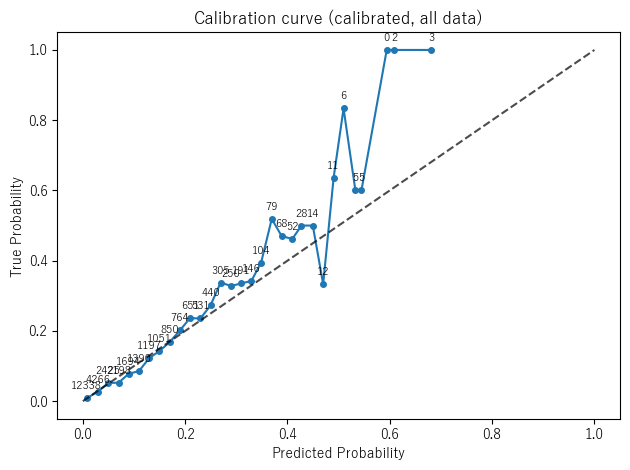

In [ ]:
plot_calibration_curve(df_pred, title="Calibration curve (calibrated, all data)")

Breier Score: 0.03842488086115884
LogLoss: 0.1551610235460004


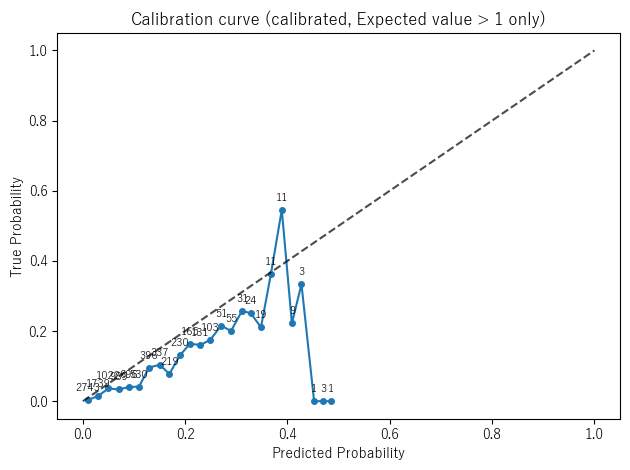

In [ ]:
df_pred["exp_value"] = df_pred["win_odds"] * df_pred["pred"]
plot_calibration_curve(df_pred[df_pred["exp_value"] > 1], title="Calibration curve (calibrated, Expected value > 1 only)")

In [ ]:
tmp = df_pred[["race_id", "id_for_fold", "year", "month", "day", "place", "horse", "pred", "target"]]

,race_id,year,month,day,times,place,daily,race_num,horse,jockey_id,trainer_id,horse_N,waku_num,horse_num,class_code,track_code,corner_num,dist,state,weather,age_code,sex,age,basis_weight,blinker,weight,inc_dec,weight_code,win_odds,win_mul_odds_Hi,win_mul_odds_Lo,rank,time_diff,time,corner1_rank,corner2_rank,corner3_rank,corner4_rank,last_3F_time,last_3F_rank,Ave_3F,PCI,PCI3,RPCI,last_3F_time_diff,leg,pop,prize,error_code,father,mother,broodmare_sire,broodmare_sire_type,horse_color,id,id_for_fold,field_type,flat_or_jump,turn_type,race_type,waku,datetime,age_type,dist_type,target3,weight_last_1,weight_last_2,weight_last_3,weight_mean_last_1_to_3,weight_mean_all,inc_dec_last_1,inc_dec_last_2,inc_dec_last_3,inc_dec_mean_last_1_to_3,inc_dec_mean_all,last_3F_time_last_1,last_3F_time_last_2,last_3F_time_last_3,last_3F_time_mean_last_1_to_3,last_3F_time_mean_all,Ave_3F_last_1,Ave_3F_last_2,Ave_3F_last_3,Ave_3F_mean_last_1_to_3,Ave_3F_mean_all,num_of_entries,中団,先行,後方,逃げ,ﾏｸﾘ,後方_per_entries,後方_cumcount_past_racing,中団_per_entries,中団_cumcount_past_racing,逃げ_per_entries,逃げ_cumcount_past_racing,先行_per_entries,先行_cumcount_past_racing,ﾏｸﾘ_per_entries,ﾏｸﾘ_cumcount_past_racing,past_rank_mean,past_rank_mean_grouped_waku,past_rank_mean_grouped_dist_type,past_rank_mean_grouped_dist,past_rank_mean_grouped_class_code,past_rank_mean_grouped_place,past_rank_mean_grouped_dist_type_waku,past_corner1_rank_mean,past_corner1_rank_mean_grouped_dist_type,past_corner1_rank_mean_grouped_dist,past_corner2_rank_mean,past_corner2_rank_mean_grouped_dist_type,past_corner2_rank_mean_grouped_dist,past_corner3_rank_mean,past_corner3_rank_mean_grouped_dist_type,past_corner3_rank_mean_grouped_dist,past_corner4_rank_mean,past_corner4_rank_mean_grouped_dist_type,past_corner4_rank_mean_grouped_dist,past_pop_mean,past_pop_mean_grouped_dist,past_pop_mean_grouped_dist_type,past_pop_mean_grouped_place,past_pop_mean_grouped_class_code,past_last_3F_rank_mean,past_last_3F_rank_mean_grouped_dist,past_last_3F_rank_mean_grouped_dist_type,past_last_3F_rank_mean_grouped_dist_type_waku,past_last_3F_time_mean,past_last_3F_time_mean_grouped_dist,past_last_3F_time_mean_grouped_dist_type,past_last_3F_time_mean_grouped_dist_type_waku,basis_weight_per_weight,basis_weight_plus_weight,inc_dec_rate,lifetime_prize,lifetime_prize_per_race,interval_day,horse_TrueSkill,horse_TrueSkill_sigma,horse_TrueSkill_min,horse_TrueSkill_max,horse_TrueSkill_after_racing,jockey_TrueSkill,jockey_TrueSkill_sigma,jockey_TrueSkill_min,jockey_TrueSkill_max,jockey_TrueSkill_after_racing,horse_EloRating,horse_EloRating_after_racing,jockey_EloRating,jockey_EloRating_after_racing,horse_Glicko2,horse_Glicko2_RD,horse_Glicko2_min,horse_Glicko2_max,horse_Glicko2_after_racing,horse_TrueSkill_diff_from_last1_racing,horse_TrueSkill_diff_from_last3_racing,jockey_TrueSkill_diff_from_last1_racing,jockey_TrueSkill_diff_from_last3_racing,horse_EloRating_diff_from_last1_racing,horse_EloRating_diff_from_last3_racing,jockey_EloRating_diff_from_last1_racing,jockey_EloRating_diff_from_last3_racing,horse_Glicko2_diff_from_last1_racing,horse_Glicko2_diff_from_last3_racing,horse_TrueSkill horse_TrueSkill_min,horse_TrueSkill horse_TrueSkill_max,horse_TrueSkill jockey_TrueSkill,horse_TrueSkill jockey_TrueSkill_min,horse_TrueSkill jockey_TrueSkill_max,horse_TrueSkill horse_EloRating,horse_TrueSkill jockey_EloRating,horse_TrueSkill horse_Glicko2,horse_TrueSkill horse_Glicko2_min,horse_TrueSkill horse_Glicko2_max,horse_TrueSkill_min horse_TrueSkill_max,horse_TrueSkill_min jockey_TrueSkill,horse_TrueSkill_min jockey_TrueSkill_min,horse_TrueSkill_min jockey_TrueSkill_max,horse_TrueSkill_min horse_EloRating,horse_TrueSkill_min jockey_EloRating,horse_TrueSkill_min horse_Glicko2,horse_TrueSkill_min horse_Glicko2_min,horse_TrueSkill_min horse_Glicko2_max,horse_TrueSkill_max jockey_TrueSkill,horse_TrueSkill_max jockey_TrueSkill_min,horse_TrueSkill_max jockey_TrueSkill_max,horse_TrueSkill_max horse_EloRating,horse_TrueSkill_max jockey_EloRating,horse_T